<a href="https://colab.research.google.com/github/MRdvan/Pytorch-Training/blob/master/Pytorch-fundamentals-to-deploy/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [99]:
# Check for GPU
!nvidia-smi

Fri Oct  7 10:58:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    32W /  70W |   1166MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [100]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

1.12.1+cu113


## 1. What are 3 areas in industry where computer vision is currently being used?

In [101]:
#Transportation
#Healthcare
#Manufacturing
#Construction
#Agriculture

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

*  **overfitting happens when ml model learn the pattern inside training data and have a succesfull results on training data but when evaluating with test data model can't predict good as much as on the training data beacuse model not quite generalize its just memorized some quick patterns inside training data distrubition. **

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* to prevent or solve overfitting issue we can do;
 

1.   Getting more data
2.   Do data augmentation
3.   Do Regularization on weights
4.   Try changing model architecture(make is smaller)
5.   Add dropout layers 



## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [102]:
#Done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [103]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

train_dataset = datasets.MNIST(root="data",train=True,transform = ToTensor(),download = True)
test_dataset = datasets.MNIST(root="data",train=False,transform = ToTensor(),download = True)

In [104]:
len(train_dataset),len(test_dataset)

(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [105]:
image,label = train_dataset[0]
image.shape

torch.Size([1, 28, 28])

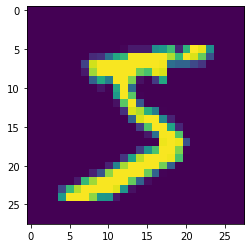

In [106]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze())

In [107]:
# See classes
class_names = train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [108]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size = 16,shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size = 16,shuffle = False)

In [109]:
len(train_loader),len(test_loader)

(3750, 625)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [110]:
import torch.nn as nn
class BasicCNNmodel(nn.Module):
  def __init__(self,in_shape,out_shape,hidden_size) -> None:
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = in_shape,out_channels = hidden_size,kernel_size = 3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_size,out_channels = hidden_size,kernel_size = 3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_size,out_channels = hidden_size*2,kernel_size = 3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_size*2,out_channels = hidden_size*2,kernel_size = 3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_size*2*7*7,out_features = out_shape)
    )
  
  def forward(self,x:torch.Tensor):
    out_1 = self.block_1(x)
    out_2 = self.block_2(out_1)
    output = self.classifier(out_2)
    return output


torch.manual_seed(42)
model=BasicCNNmodel(in_shape=1,out_shape=len(class_names),hidden_size =10).to(device)
model

BasicCNNmodel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=980, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [111]:
!pip install torchmetrics
import torchmetrics
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params = model.parameters(),lr = 0.01)
acc_fn = torchmetrics.Accuracy().to(device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
X,y = next(iter(train_loader))
X = X.to(device)
logit=model(X)
torch.softmax(logit,dim=1).argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')

In [113]:
from tqdm import tqdm
epochs = 5

for epoch in tqdm(range(epochs)):
  train_loss = 0
  train_acc = 0
  for batch , (X,y) in enumerate(train_loader):
    X = X.to(device)
    y = y.to(device)

    #forward
    logit = model(X)
    pred = torch.softmax(logit,dim=1).argmax(dim=1)

    #loss & acc
    loss = loss_fn(logit,y)
    acc = acc_fn(pred,y)
    train_loss += loss
    train_acc += acc
    

    #backward
    optim.zero_grad()
    loss.backward()
    optim.step()

  train_loss /= len(train_loader)
  train_acc /= len(train_loader)
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for batch , (X,y) in enumerate(test_loader):
      X = X.to(device)
      y = y.to(device)
      #forward
      logit = model(X)
      pred = torch.softmax(logit,dim=1).argmax(dim=1)

      #loss & acc
      test_loss += loss_fn(logit,y)
      test_acc += acc_fn(pred,y)
    test_loss /= len(test_loader)
    test_acc /= len(test_loader)
  print(f"train_loss: {train_loss} train_acc: {train_acc} test_loss {test_loss} test_acc {test_acc}")



 20%|██        | 1/5 [00:27<01:50, 27.58s/it]

train_loss: 0.6195928454399109 train_acc: 0.7870833277702332 test_loss 0.10670636594295502 test_acc 0.9645999670028687


 40%|████      | 2/5 [00:48<01:10, 23.51s/it]

train_loss: 0.09277008473873138 train_acc: 0.971916675567627 test_loss 0.07720351219177246 test_acc 0.975600004196167


 60%|██████    | 3/5 [01:08<00:44, 22.18s/it]

train_loss: 0.06866109371185303 train_acc: 0.978950023651123 test_loss 0.06620147824287415 test_acc 0.977400004863739


 80%|████████  | 4/5 [01:30<00:22, 22.13s/it]

train_loss: 0.056960877031087875 train_acc: 0.9825833439826965 test_loss 0.04877343401312828 test_acc 0.9848999977111816


100%|██████████| 5/5 [01:51<00:00, 22.28s/it]

train_loss: 0.04949457570910454 train_acc: 0.9840166568756104 test_loss 0.04114551097154617 test_acc 0.9854999780654907


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [128]:
# 1. Make predictions with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_loader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|██████████| 625/625 [00:01<00:00, 471.18it/s]


In [115]:
pred[:5]

tensor([7, 2, 1, 0, 4], device='cuda:0')

In [116]:
y[:5]

tensor([1, 2, 3, 4, 5], device='cuda:0')

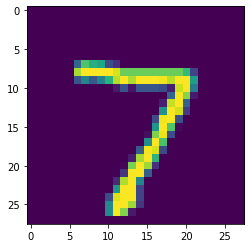

In [117]:
plt.imshow(x[0].squeeze().cpu())

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [118]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

mlxtend version: 0.14.0
mlxtend version: 0.14.0


In [129]:
y_pred_tensor.shape

torch.Size([10000])

In [130]:
test_dataset.targets.shape

torch.Size([10000])

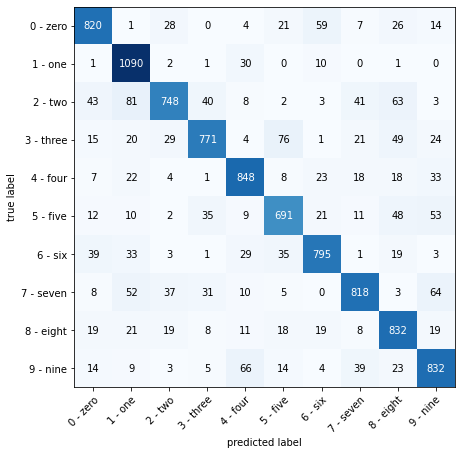

In [131]:
confmat = ConfusionMatrix(num_classes = 10)
confmat_tensor = confmat(preds = y_pred_tensor,target = test_dataset.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

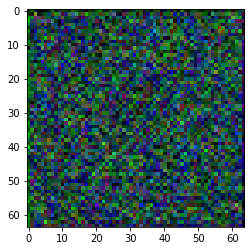

In [155]:
random_image = torch.rand(1,3,64,64)
random_image.shape
conv=nn.Conv2d(in_channels = 3,out_channels = 3,kernel_size = 3,stride=1,padding=1)
conv1=nn.Conv2d(in_channels = 3,out_channels = 3,kernel_size = 5,stride=1,padding=1)
conv2=nn.Conv2d(in_channels = 3,out_channels = 3,kernel_size = 7,stride=1,padding=1)

out = conv(random_image)
plt.imshow(out.squeeze().permute(2,1,0).detach().numpy())



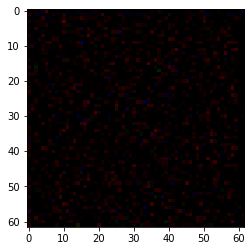

In [156]:
out = conv1(out)
plt.imshow(out.squeeze().permute(2,1,0).detach().numpy())


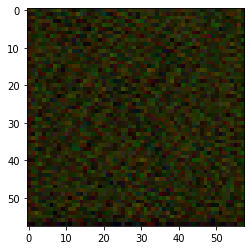

In [157]:
out = conv2(out)
plt.imshow(out.squeeze().permute(2,1,0).detach().numpy())

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [164]:
# Check to see if results are close to each other
torch.isclose(torch.tensor(test_dataset.targets), 
              torch.tensor(y_pred_tensor),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([True, True, True,  ..., True, True, True])